Poincaré Continuation Method
============================

Let 
\begin{equation}\label{system}
  \dot{\bf{x}}=\bf{F}(\bf{x};\sigma)
\end{equation}
  
be an autonomous differential system of $n$ equations that depend on a parameter $\sigma$. The
solution 
\begin{equation}\label{solution}
\bf{x}=\bf{x}(t;\bf{\xi};\sigma)
\end{equation}
represents the flux of the system (\ref{system}), which is a function of the parameter $\sigma$ and of the
initial conditions ${\bf \xi}={\bf x}(0;{\bf \xi};\sigma)$.

Let assume that for a certain value of a parameter $\sigma=\sigma^\star$
and for the initial conditions ${\bf \xi}={\bf \xi}_0$, a solution
${\bf x}_0={\bf x}(t;{\bf \xi}_0;\sigma^\star)$ of the system is known
and periodic with period $T_0>0$, i.e. 
\begin{equation}\label{periodic}
\bf{x}(t;\bf{\xi}_0;\sigma^\star)=\bf{x}(t+T_0;\bf{\xi}_0;\sigma^\star).
\end{equation}
The so-called *Poincaré’ continuation method* tackles the analytical
continuation of the periodic solution for values of the parameter close
to the initial value $\sigma^\star$. That is, given
$\sigma=\sigma^\star+\Delta\sigma$, new initial conditions
${\bf \xi}={\bf \xi}_0+\Delta{\bf \xi}$ are required to lead to a
periodic solution of the system (\ref{system}), with a new period
$T=T_0+\Delta{T}$.

As a consequence of the theorem of existence and uniqueness of
differential equations, the equation will be satisfied for all $t$ if it
does for a certain value $t_0$, say $t_0=0$. It is enough, therefore,
that the new solution verifies just the periodicity condition
\begin{equation}\label{condition}
\bf{x}(T;\bf{\xi};\sigma)-\bf{\xi}=0.
\end{equation} 
where the existence of the
implicit functions ${\bf \xi}$ is directly related to the no
cancellation of the Jacobian determinant of the left-hand side member of
the system (\ref{condition}). Regarding the possible cancellation of this
determinant, there can be different possibilities depending on the
existence of integrals of the system (\ref{system}). The interested reader
can consult the reference [Siegel and Moser, 1971].

### References

Siegel, C.L., Moser, J.K., *Lectures on Celestial Mechanics*,
Springer–Verlag, Berlin Heidelberg New York, 1971, pp. 143 ff.


Example: Lorenz system
======================

“The Lorenz system is a system of ordinary differential equations (the
Lorenz equations) first studied by Edward Lorenz. It is notable for
having chaotic solutions for certain parameter values and initial
conditions.” ([from
Wikipedia](http://en.wikipedia.org/wiki/Lorenz_system))

The equations of motion are [Lorenz, 1963]
\begin{equation}\label{lorenz}
\dot{x}=\sigma\,(y-x),\qquad
\dot{y}=x\,(\rho-z)-y,\qquad
\dot{z}=x\,y-\beta\,z,
\end{equation} 
where the dot means derivation with respect to
the independent variable $t$, and we assume fixed values $\sigma=10$,
$\beta=8/3$, and take $\rho$ as a parameter. Many periodic solutions are
known for this system [Sparrow, 1982; Viswanath, 2003].

The variational equations of system (\ref{lorenz}) are 
\begin{equation}\label{vlorenz}
\delta\dot{x}=\sigma\,(\delta{y}-\delta{x}),\qquad
\delta\dot{y}=\delta{x}\,(\rho-z)+x\,(\color{red}\delta\rho\color{black}-\delta{z})-\delta{y},\qquad
\delta\dot{z}=\delta{x}\,y+x\,\delta{y}-\beta\,\delta{z},
\end{equation}
where $\delta\rho\equiv0$ in the case of homogeneous variations.

### References

Lorenz, E.N., “Deterministic Nonperiodic Flow,” *Journal of Atmospheric Sciences*, Vol. 20, 1963, pp. 130–141. 

Sparrow, C., *The Lorenz Equations: Bifurcations, Chaos, and Strange Attractors*, (NewYork: Springer), 1982. 

Viswanath, D., “Symbolic dynamics and periodic orbits of the Lorenz attractor,” *Nonlinearity*, Vol. 16, 2003, pp. 1035–1056.

### Family of AB-type orbits

The propagation of the initial conditions $x_0=0$, $y_0=1.8$, $z_0=22$,
for the value $\rho=28$ of the parameter shows the typical pattern in
the cell below. 

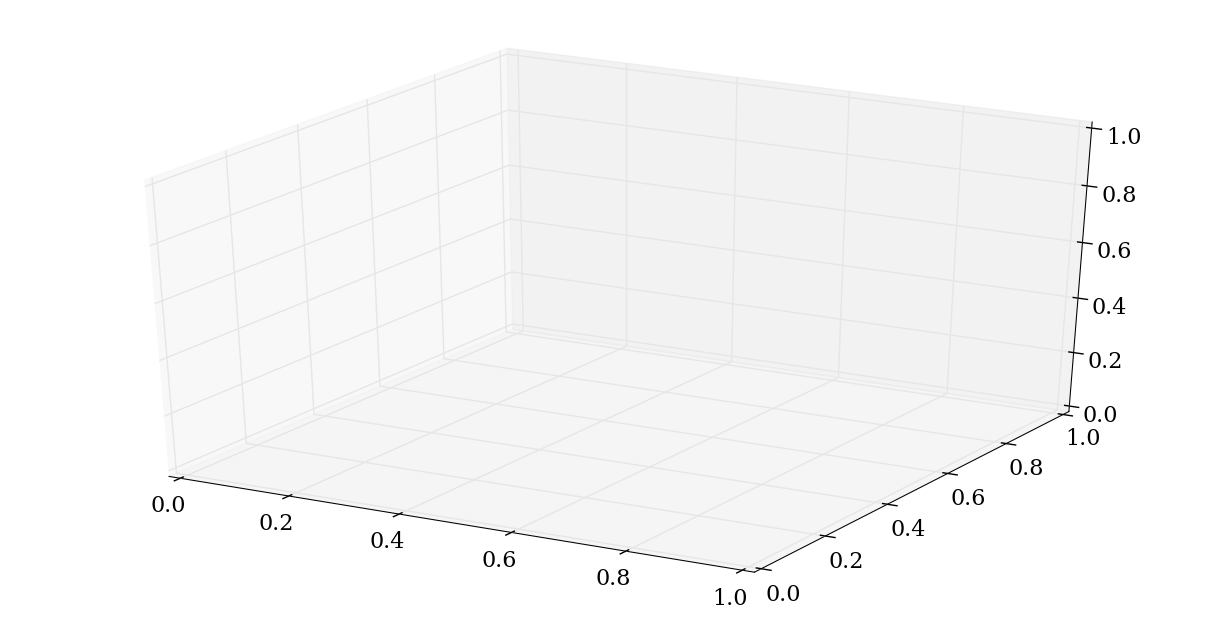

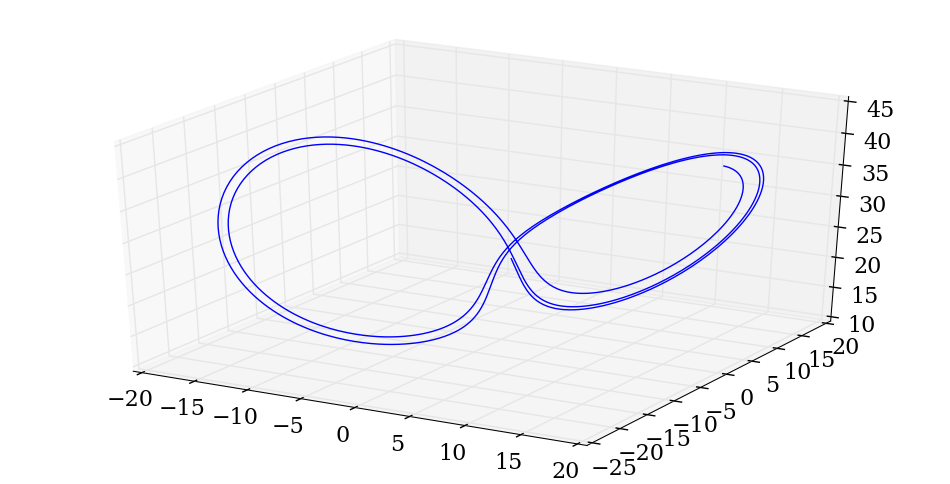

In [2]:
import numpy as np
import matplotlib
from scipy import integrate
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

# Function that computes the derivatives of the Lorentz system
def lorentz_ode(x, t):
    dx1 = sigma*(x[1] - x[0])
    dx2 = x[0]*(rho - x[2])- x[1]
    dx3 = x[0]*x[1] - beta*x[2]
    return [dx1, dx2, dx3]  

# Function that computes the derivatives of the variational equations of the Lorentz system
def lorentz_var(x,t, sigma, beta, rho): 
    #
    dx0 = sigma*(x[1] - x[0])
    dx1 = x[0]*(rho - x[2])- x[1]
    dx2 = x[0]*x[1] - beta*x[2]
    # Variational equations
    # xx
    dx3 = ( - sigma ) * x[3] + sigma * x[6]
    # xy
    dx4 = ( - sigma ) * x[4] + sigma * x[7]
    # xz
    dx5 = ( - sigma ) * x[5] + sigma * x[8]
    # yx 
    dx6 = ( rho - x[2] ) * x[3] - x[6] - x[0] * x[9]
    # yy
    dx7 = ( rho - x[2] ) * x[4] - x[7] - x[0] * x[10]
    # yz 
    dx8 = ( rho - x[2] ) * x[5] - x[8] - x[0] * x[11]
    # zx 
    dx9 =  x[1] * x[3] + x[0] * x[6] - beta * x[9]
    # zy 
    dx10 = x[1] * x[4] + x[0] * x[7] - beta * x[10]
    # zz 
    dx11 = x[1] * x[5] + x[0] * x[8] - beta * x[11]
    #
    return [dx0, dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10, dx11]  
    
    


def lorentz_comp(x,t, sigma, beta, rho): 
    #
    dx0 = sigma*(x[1] - x[0])
    dx1 = x[0]*(rho - x[2])- x[1]
    dx2 = x[0]*x[1] - beta*x[2]
    # Variational equations
    # xx
    dx3 = ( - sigma ) * x[3] + sigma * x[6]
    # xy
    dx4 = ( - sigma ) * x[4] + sigma * x[7]
    # xz
    dx5 = ( - sigma ) * x[5] + sigma * x[8]
    # yx 
    dx6 = ( rho - x[2] ) * x[3] - x[6] - x[0] * x[9]
    # yy
    dx7 = ( rho - x[2] ) * x[4] - x[7] - x[0] * x[10]
    # yz 
    dx8 = ( rho - x[2] ) * x[5] - x[8] - x[0] * x[11]
    # zx 
    dx9 =  x[1] * x[3] + x[0] * x[6] - beta * x[9]
    # zy 
    dx10 = x[1] * x[4] + x[0] * x[7] - beta * x[10]
    # zz 
    dx11 = x[1] * x[5] + x[0] * x[8] - beta * x[11]
    #
    dxds1 = ( - sigma ) * x[12] + sigma * x[13]
    #
    dxds2 = ( rho - x[2] ) * x[12] - x[13] - x[0] * x[14] + x[0]
    #
    dxds3 = x[1] * x[12] + x[0] * x[13] - beta * x[14]
    #
    return [dx0, dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10, dx11, dxds1, dxds2, dxds3] 
    
# Parameters
sigma = 10
beta = 8/3
rho = 28

# Initial conditions 
xi0  = [0, 1.8, 22]
var0 = np.array([1, 0, 0, 0, 1, 0, 0 , 0 , 1])
x0   = np.concatenate((xi0, var0))

# Time span
Delta_t = np.linspace(0, 3.6, num=1000)

# Integration of Ordinary Differential Equation
asol = integrate.odeint(lorentz_var, x0, Delta_t, args=(sigma, beta, rho))

# Plot the figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(asol[:,0], asol[:,1], asol[:,2])
plt.show()

Tangent approximation
=====================

If equation (\ref{condition}) is written as: 
\begin{equation}\label{condition0}
\bf{x}(T_0+\Delta{T};\bf{\xi}_0+\Delta\bf\xi;\sigma^\star+\Delta\sigma)-(\bf{\xi}_0+\Delta\bf\xi)=\bf{0}
\end{equation}
and it is expanded in series about $(T_0;\bf{\xi}_0;\sigma^\star)$, we
obtain in first order 
$$\bf{x}
+\frac{\partial\bf{x}}{\partial{T}}\,\Delta{T}+\nabla_{\bf{\xi}}\bf{x}\cdot\Delta\bf\xi+\frac{\partial\bf{x}}{\partial\sigma}\,\Delta\sigma-(\bf{\xi}_0+\Delta\bf\xi)=\bf{0}$$
where the flux $\bf{x}\equiv\bf{x}(t;\bf\xi;\sigma)$ and its derivatives
must be evaluated at $(T_0;\bf{\xi}_0;\sigma^\star)$. Therefore, a
lineal system in $\Delta{T}$, $\Delta\bf\xi$ and $\Delta\sigma$ is
obtained, 
\begin{equation}\label{linear}
\bf{F}(\bf{x};\sigma^\star)\,\Delta{T}
+\left(\nabla_{\bf{\xi}}\bf{x}-\bf{I}\right)\cdot\Delta\bf\xi
+\frac{\partial\bf{x}}{\partial\sigma}\,\Delta\sigma=-(\bf{x}-\bf{\xi}_0)
\end{equation}
where $\bf{I}$ is the identity matrix $n\times{n}$.

The equation (\ref{linear}) provides the basic scheme to practically carry
out Poinceré’s continuation method. The right hand side member of
equation (\ref{linear}) cancels out exactly for a periodic solution
(\ref{periodic}) of the system (\ref{system}). Therefore, we can use
\begin{equation}\label{predictor}
  (\nabla_{\bf{\xi}}\bf{x}-\bf{I})\cdot\frac{\Delta\bf\xi}{\Delta\sigma}+\bf{F}(\bf{x};\sigma^\star)\frac{\Delta{T}}{\Delta\sigma}=-\frac{\partial\bf{x}}{\partial\sigma}
\end{equation}
evaluated at $(T_0;\bf{\xi}_0;\sigma^\star)$, to compute the inicial
conditions $\bf{\xi}_1=\bf{\xi}_0+\Delta\bf{\xi}$ and the period
$T_1=T_0+\Delta\,T$ corresponding to a new periodic solution of
(\ref{system}) for a new parameter value
$\sigma=\sigma^\star+\Delta\sigma$.

The solution of the equation (\ref{predictor}) provides only a tangent
estimation and could happen that
$\bf{x}(T_1;\bf{\xi}_1;\sigma)-\bf\xi_1\ne{\bf 0}$. In that case, new
corrections must be computed $\Delta\bf{\xi}_1$ and $\Delta\,T_1$, such
that 

\begin{equation}\label{itera}
\bf{x}(T_1+\Delta{T_1}) ; \bf{\xi_1}+\Delta\bf\xi_1;\sigma)-(\bf{\xi_1} + \Delta\bf\xi_1)={\bf 0}.
\end{equation}

The equations (\ref{itera}) y (\ref{condition0}) are formally equal,
although now $\Delta\sigma\equiv0$; therefore, equations (\ref{linear})
can be used to get the corrections. Thus, it can be necessary to compute
successive correction of 

\begin{equation}\label{corrector}
\bf{F}(\bf{x};\sigma)\,\Delta{T_i} +(\nabla_{\bf{\xi}}\bf{x}-\bf{I})\cdot\Delta {\bf\xi_i}=-(\bf{x}-\bf\xi_i),
\end{equation}

expression that must be evaluated at $(T_i;\bf{\xi}_i;\sigma)$. Note
that the right hand side member of the equation does not cancel out.

To solve the linear system (\ref{condition0}), or (\ref{corrector}), we need
to know the partial derivatives of the flux with respect to th e initial
conditions and the parameter. The former, $\nabla_{\bf{\xi}}\bf{x}$, are
solutions of the variational equations of (\ref{system})

\begin{equation}\label{variations}
  \nabla_{\bf\xi}\bf{\dot{x}}=(\nabla_{\bf{x}}\bf{F})\cdot(\nabla_{\bf{\xi}}\bf{x}),
\end{equation}

for the initial conditions 

\begin{equation}\label{initial}
  \left(\nabla_{\bf{\xi}}\bf{x}\right)_{t=0}=\bf{I},
\end{equation}

that are obtained
from $\bf{x}(0;\bf\xi;\sigma)=\bf\xi$. In a similar way, the partial
derivative $\partial\bf{x}/\partial\sigma$ is a solution of the
non-homogenous variational system 

\begin{equation}\label{particular}
  \frac{\partial\bf{\dot{x}}}{\partial\sigma}=(\nabla_{\bf{x}}\bf{F})\cdot\frac{\partial\bf{x}}{\partial\sigma}+\frac{\partial\bf{F}}{\partial\sigma}
\end{equation}

for the initial conditions $(\partial\bf{x}/\partial\sigma)_{t=0}=0$.

The algorithm below presents a posible continuation scheme for
periodic solutions based on the prediction-correction method


|     | **Algorithm 1.**|
|:---:|---|
| [1]   | **Input**: $\sigma_0$, $\bf{\xi}_0$, $T_0$; |
| [2]   | **Input**:$\Delta\sigma$; number of orbits $m$; periodicity condition $\varepsilon$ |
| [3]  | **for** $i = 0 \rightarrow m$ **do**|
| [4]  | $\quad$ integrate Eq. (\ref{system}) with $\bf{\xi}_i$ and Eq. (\ref{variations})–(\ref{initial}), from $t=0\to T_i$ |
| [5] | $\quad$ ** while** $\sqrt{\left({\bf x_i(T_i)} - {\bf \xi_i}\right)^{T}\left({\bf x_i(T_i)} - {\bf \xi_i}\right)} > \varepsilon $ **do**|
| [6]| $\quad$ $\quad$ corrector: solve Eq. (\ref{corrector}) for $\Delta\bf{\xi}$ and $\Delta{T}$|
|[7] | $\quad$ $\quad$ $\bf{\xi}_i\rightarrow\bf{\xi}_i+\Delta\bf{\xi}$, $T_i\rightarrow T_i+\Delta{T}$ |
| [8] | $\quad$ $\quad$ integrate Eq. (\ref{system}) with $\bf{\xi}_i$ and Eq. (\ref{variations})–(\ref{initial}), from $t=0\to T_i$ |
|[9] | $\quad$ **end while** |
| [10] | $\quad$ **print** $\bf{\xi}_i$, $T_i$, $\sigma_i$ |
|[11]| $\quad$ **if** $i < m$ **then**|
|[12]| $\quad$ $\quad$ integrate Eq. (\ref{system}) with $\bf{\xi}_i$, and Eq. (\ref{variations})–(\ref{particular}), from $t=0 \to T_i$ |
|[13]| $\quad$ $\quad$ predictor: solve Eq. (\ref{predictor}) for $\Delta\bf{\xi}/\Delta\sigma$ and $\Delta{T}/\Delta\sigma$ |
|[14]| $\quad$ $\quad$ compute $\sigma_{i+1}=\sigma_i+\Delta\sigma$, $\bf{\xi}_{i+1}=\bf{\xi}_i+\Delta\bf{\xi}$ and $T_{i+1}=T_i+\Delta{T}$ |
|[15]| $\quad$ **end if **|
|[16]| **end for**|
|[17]| **Output**: file with $\sigma_i$, $\bf{\xi}_i$, $T_i$ for each periodic orbit |



1.59959936406 [  0.           1.6122514   20.95943565] 27
4.85286141234e-07
1.48602680897 [  0.           2.011643    23.75974413] 30
2.72549553689e-07
1.3949330424 [  0.           2.40799262  26.50177798] 33
3.44631259113e-07
1.31952253295 [  0.           2.80152717  29.20375271] 36
4.62466509387e-07
1.2556268701 [  0.           3.19256216  31.87676723] 39
8.66712220498e-07
1.20051000722 [  0.           3.58141253  34.52804782] 42
4.13486502814e-07
1.15228339242 [  0.           3.96836193  37.16254219] 45
2.24249276312e-07
1.10959155646 [  0.           4.35365811  39.78376874] 48
6.69296344756e-07
1.07143078455 [  0.           4.73751407  42.39430499] 51
4.59194261219e-07
1.03703852154 [  0.           5.12011039  44.99609188] 54
3.43323823903e-07
1.00582288069 [  0.           5.50160161  47.59062024] 57
2.72453226271e-07
0.977316003653 [  0.           5.88211858  50.17905465] 60
2.26124521886e-07
0.951142221678 [  0.           6.2617743   52.76232183] 63
1.93263731895e-07
0.9269957483

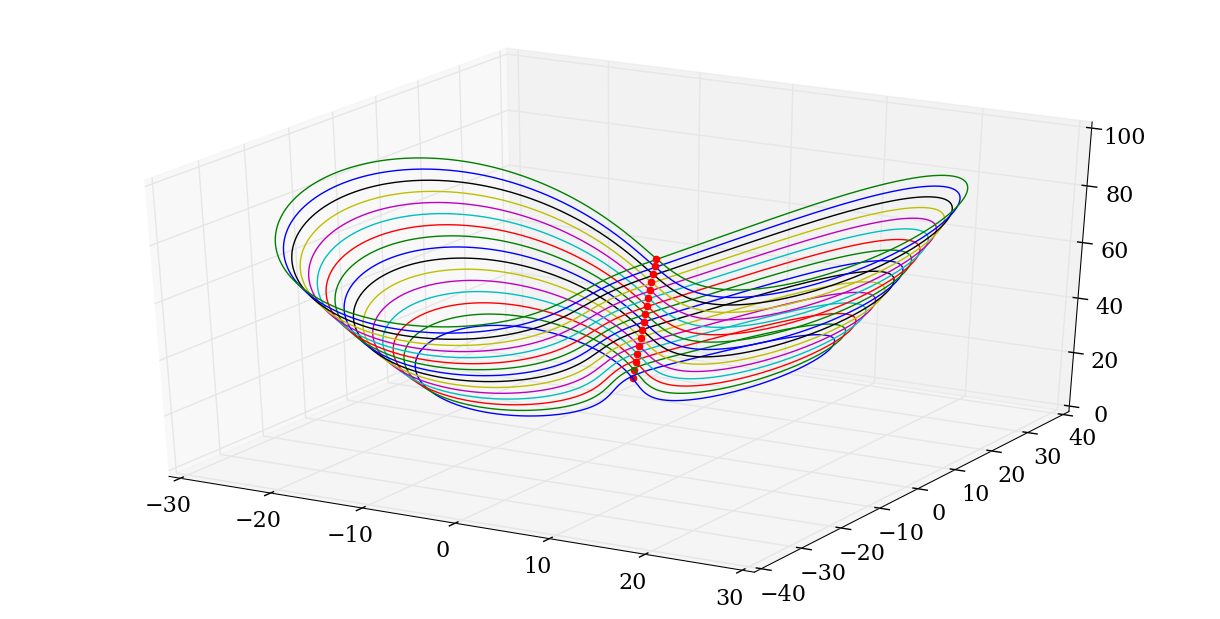

In [7]:
import numpy as np
import matplotlib
import pylab as p
from scipy import integrate
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)


def pred_corr(sigma, xi, T, deltaS, m, epsilon):
    m_max = 15
    m     = np.linspace(0, m_max, num=m_max+1)
    # Plot the figure 
    fig=p.figure()
    ax = p3.Axes3D(fig)
    #
    ax.hold(True)
    #
    for ii in m:
        # Time span
        Delta_t = np.linspace(0, T, num=1000)
        # Initial conditions
        var0 = np.array([1, 0, 0, 0, 1, 0, 0 , 0 , 1])
        x0   = np.concatenate((xi, var0))
        # Integration of Ordinary Differential Equation
        sigmaL = 10
        beta   = 8/3
        allsol = integrate.odeint(lorentz_var, x0, Delta_t, args=(sigmaL, beta, sigma))
        # Error  
        err = np.linalg.norm(allsol[-1,0:3] - xi)        
        # Corrector
        counter = 0
        while err > epsilon: 
            counter = counter+1            
            F_xi   = lorentz_ode(allsol[-1,0:3], T)            
            #DeltaT = (xi[0] - allsol[-1,0])/F_xi[0]            
            AuxMat = np.array([[F_xi[0], allsol[-1,4], allsol[-1,5]],[F_xi[1], allsol[-1,7]-1, allsol[-1,8]], [F_xi[2], allsol[-1,10], allsol[-1,11]-1]])
            DeltaAux = np.linalg.solve(AuxMat, np.transpose(xi[0:3] - allsol[-1,0:3]))
            DeltaT = DeltaAux[0]
            #
            Deltaxi  = np.concatenate(([0], DeltaAux[1:3]))
            #
            xi   = xi + Deltaxi
            x0   = np.concatenate((xi, var0))
            T    = T + DeltaT
            #
            Delta_t = np.linspace(0, T, num=1000)
            allsol = integrate.odeint(lorentz_var, x0, Delta_t, args=(sigmaL, beta, sigma))
            err = np.linalg.norm(allsol[-1,0:3] - xi)
            #print(err)
            #print(counter)
        print(T, xi, sigma)
        print(err)
        # Plot the figure 
        #
        ax.plot3D(allsol[:,0], allsol[:,1], allsol[:,2])
        ax.scatter3D(allsol[0,0], allsol[0,1], allsol[0,2], color='red')
        #
        #
        #plt.show()
        #input()
        #
        if ii < m_max: 
            # Time span
            Delta_t = np.linspace(0, T, num=1000)
            # Initial conditions
            var0 = np.array([1, 0, 0, 0, 1, 0, 0 , 0 , 1])
            dxds0 = np.array([0, 0, 0])
            x0   = np.concatenate((xi, var0, dxds0))
            # 
            allsol = integrate.odeint(lorentz_comp, x0, Delta_t, args=(sigmaL, beta, sigma))
            #
            F_xi   = lorentz_ode(allsol[-1,0:3], T)            
            #DeltaT = (xi[0] - allsol[-1,0])/F_xi[0]            
            AuxMat = np.array([[F_xi[0], allsol[-1,4], allsol[-1,5]],[F_xi[1], allsol[-1,7]-1, allsol[-1,8]], [F_xi[2], allsol[-1,10], allsol[-1,11]-1]])
            DeltaAux = np.linalg.solve(AuxMat, - allsol[-1,12:15])
            sigma = sigma + deltaS
            DeltaT = DeltaAux[0] * deltaS
            #
            Deltaxi  = np.concatenate(([0], DeltaAux[1:3])) * deltaS
            T  = T + DeltaT
            xi = xi + Deltaxi
    plt.show()
            

    
    

# Parameters
#sigma = 10
#beta = 8/3
#rho = 28
sigma = 27
deltaS = 3
m = 100
epsilon = 1e-6

# Initial conditions
xi0 = [0, 1.8, 22]
T   = 1.5586

pred_corr(sigma, xi0, T, deltaS, m, epsilon)